# Regresión lineal múltiple

La regresión lineal múltiple consiste en la aplicación de dos posibles métodos. En el primer método vamos añadiendo variables a nuestro modelo y comprobamos como los parámetros cambian, mientras que el segundo método vamos quitando variables.

## Backward elimination

Método en el cual incluimos todas las variables y vamos eliminando aquellas que sean menos significativas en nuestro modelo.

1. Seleccionamos un nivel de significancia, por ejemplo $\alpha = 0.05$
2. Entrenamos el modelo completo, con todos los posibles predictores.
3. Consideramos el predictor con el **p-valor** más **alto** que el nivel de significancia. En caso de no haber ningún valor más alto habríamos terminado.
4. Eliminamos dicho predictor.
5. Entrenamos el modelo con dicha variable y volvemos al punto 3.

## Forward selection

Método en el cual vamos incluyendo variables conforme estas aportan un mejor ajuste al modelo.

1. Seleccionamos un nivel de significancia, por ejemplo $\alpha = 0.05$
2. Entrenamos todos los modelos regresivos simples, $y - x_{n}$ Seleccionamos aquel que tenga el **p-valor** más bajo.
3. Guardamos esta variable y entrenamos todos los posibles modelos con un predictor extra al que ya tenemos.
4. Consideramos el predictor con el **p-valor** más bajo. Si es así, vamos al punto 3, sino hemos terminado.


## Posibles combinaciones de las variables

* Sales ~ TV
* Sales ~ Newspaper
* Sales ~ Radio
* Sales ~ TV + Newspaper
* Sales ~ TV + Radio
* Sales ~ Newspaper + Radio
* Sales ~ TV + Newspaper + Radio

In [19]:
# bibliotecas
import pandas as pd
import numpy as np
from statsmodels.regression import linear_model
import statsmodels.formula.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# ggplot2 style
sns.set()

In [2]:
# data
df = pd.read_csv('../data/Advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## Método Forward selection

In [3]:
modelo1 = sm.ols(formula="Sales~Newspaper", data = df).fit()
modelo2 = sm.ols(formula="Sales~TV", data = df).fit()
modelo3 = sm.ols(formula="Sales~Radio", data = df).fit()

# Modelos combinados
modelo4 = sm.ols(formula="Sales~Newspaper+TV", data = df).fit()
modelo5 = sm.ols(formula="Sales~TV+Radio", data = df).fit()
modelo6 = sm.ols(formula="Sales~TV+Radio+Newspaper", data = df).fit()

In [4]:

print("Modelo1 R2: ", modelo1.rsquared)
print(modelo1.params)
print("Modelo2 R2: ", modelo2.rsquared)
print(modelo2.params) 
print("Modelo3 R2: ", modelo3.rsquared)
print(modelo3.params)
print("Modelo4 R2: ", modelo4.rsquared)
print(modelo4.params)
print("Modelo5 R2: ", modelo5.rsquared)
print(modelo5.params)
print("Modelo6 R2: ", modelo6.rsquared)
print(modelo6.params)

Modelo1 R2:  0.05212044544430516
Intercept    12.351407
Newspaper     0.054693
dtype: float64
Modelo2 R2:  0.611875050850071
Intercept    7.032594
TV           0.047537
dtype: float64
Modelo3 R2:  0.33203245544529536
Intercept    9.311638
Radio        0.202496
dtype: float64
Modelo4 R2:  0.6458354938293271
Intercept    5.774948
Newspaper    0.044219
TV           0.046901
dtype: float64
Modelo5 R2:  0.8971942610828957
Intercept    2.921100
TV           0.045755
Radio        0.187994
dtype: float64
Modelo6 R2:  0.8972106381789522
Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64


Los modelos que tienen mayores valores de $r^2$ son los modelos denominados `modelo5` y `modelo6`, los cuales corresponden a las variables `TV` y `Radio` en el primer caso y `TV`, `Radio` y `Newspaper`. Veamos un resumen detallado de los parámetros de cada modelo.

In [5]:
modelo5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Thu, 12 Jul 2018   Prob (F-statistic):           4.83e-98
Time:                        17:41:19   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
modelo6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 12 Jul 2018   Prob (F-statistic):           1.58e-96
Time:                        17:41:19   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Apreciamos que el **p-valor** aumenta en el segundo modelo estudiado para la variable `Newspaper`, a su vez el coeficiente de **AIC** aumenta ligeramente, siendo este un defecto. Esto nos lleva a pensar que el mejor modelo es el primero, que contiene las variables `TV` y `Radio`.

Hagamos un análisis de los errores en ambos modelos y veamos que diferencias existen.

## Errores en los modelos

In [7]:
sales_pred1 = modelo5.predict(df[['TV', 'Radio']])
sales_pred2 = modelo6.predict(df[['Newspaper', 'TV', 'Radio']])

In [8]:
# Desviación típica de los residuos y error cometido
SSD = np.sum((df['Sales'] - sales_pred1)**2)
RSE = np.sqrt(SSD / (len(df) - 2 - 1))
error = RSE / np.mean(df['Sales'])

(SSD,RSE,error)

(556.9139800676182, 1.681360912508001, 0.11990450436855059)

In [9]:
# Desviación típica de los residuos y error cometido
SSD = np.sum((df['Sales'] - sales_pred2)**2)
RSE = np.sqrt(SSD / (len(df) - 2 - 1))
error = RSE / np.mean(df['Sales'])

(SSD,RSE,error)

(556.8252629021872, 1.6812269856174873, 0.11989495351167673)

Los errores mejoran levemente en el segundo modelo, pero la diferencia no es palpable. Si al incluir una variable no tenemos cambios en nuestro modelo, es que esta variable no introduce mejoras. Es por ello que la variable `Newspaper` se puede deshechar.

## Multicolinealidad



In [10]:
# Matriz de correlación
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


### Factor de inflación de la varianza

$VIF = \frac{1}{1 - r^2}$

* VIF = 1 : las variables no están correlacionadas
* VIF < 5 : las variables tienen una correlación moderada y se pueden quedar en el modelo
* VIF > 5 : las variables están altamente correlacionadas y deben de desaparecer del modelo.

In [11]:
def vif(rsquared):
    return 1 / (1 - rsquared)

Modelos

* Newspaper ~ TV + Radio 
* TV ~ Newspaper + Radio 
* Radio ~ Newspaper + TV

In [12]:
# Newspaper ~ TV + Radio 
rsquared = sm.ols(formula="Newspaper~TV+Radio", data=df).fit().rsquared

# VIF
vif1 = vif(rsquared)

# TV ~ Newspaper + Radio
rsquared = sm.ols(formula="TV~Newspaper+Radio", data=df).fit().rsquared

# VIF
vif2 = vif(rsquared)

# Radio ~ Newspaper + TV
rsquared = sm.ols(formula="Radio~TV+Newspaper", data=df).fit().rsquared

# VIF
vif3 = vif(rsquared)

# Resultados
vif1, vif2, vif3

(1.145187378723929, 1.0046107849396502, 1.1449519171055351)

In [13]:
# Newspaper ~ TV + Radio 
rsquared = sm.ols(formula="Newspaper~Radio", data=df).fit().rsquared

# VIF
vif4 = vif(rsquared)

# Radio ~ Newspaper + TV
rsquared = sm.ols(formula="Radio~Newspaper", data=df).fit().rsquared

# VIF
vif5 = vif(rsquared)

# Resultados
print(vif4, vif5)
print(vif4 > vif5)

1.1433660600600446 1.1433660600600444
True


In [18]:
Sales = df['Sales']
TV, Newspaper, Radio = df['TV'], df['Newspaper'], df['Radio']

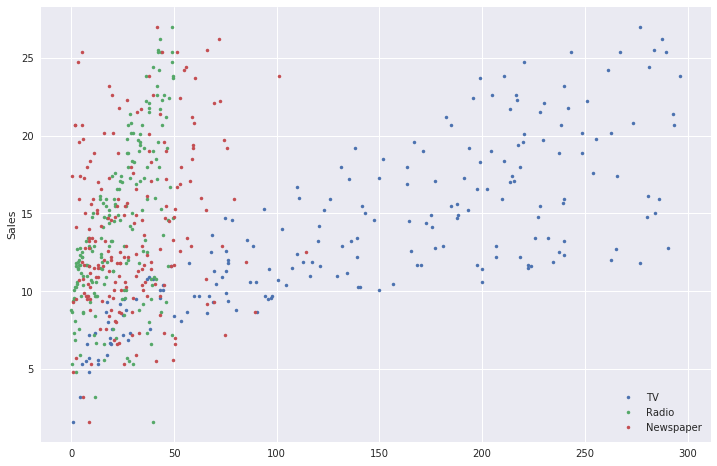

In [35]:
# Tamaño de la imagen
plt.figure(figsize=(12,8))

#sns.lmplot(x='TV', y='Sales', data=df)

plt.plot(TV, Sales, marker='.', linestyle='none', label='TV')
plt.plot(Radio, Sales, marker='.', linestyle='none', label='Radio')
plt.plot(Newspaper, Sales, marker='.', linestyle='none', label='Newspaper')
plt.ylabel("Sales")
plt.legend()

plt.show()

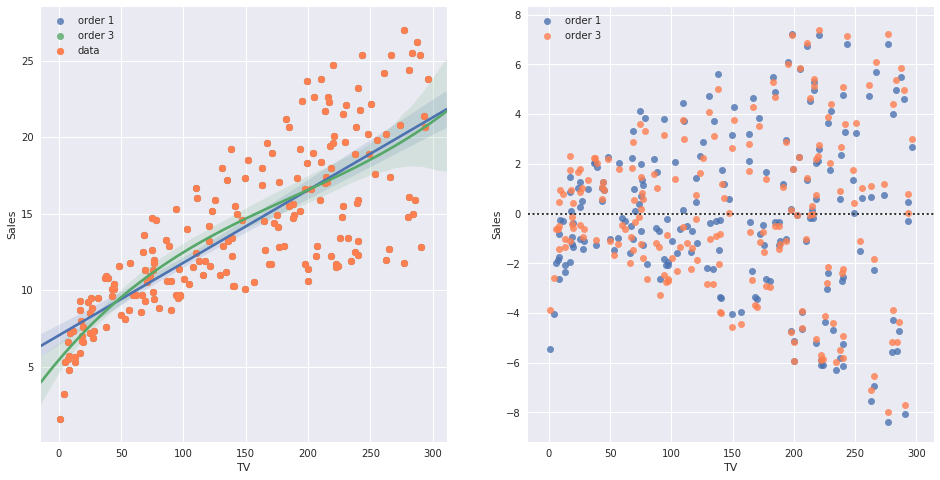

In [53]:
"""fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)"""
fig = plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.regplot(x='TV', y='Sales', data=df, order=1, label='order 1')
sns.regplot(x='TV', y='Sales', data=df, order=3, label='order 3')
plt.scatter(df['TV'], df['Sales'], label='data', color='coral', marker='o')
plt.legend()

plt.subplot(1,2,2)
sns.residplot(x='TV', y='Sales', data=df, order=1, label='order 1')
sns.residplot(x='TV', y='Sales', data=df, order=3, label='order 3', color='coral')
plt.legend()
plt.show()